# La consommation électrique annuelle pour chaque ville 

In [33]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [34]:
base =pd.read_csv('./data/conso_electrique.csv', sep = ';')
base

/tmp/ipykernel_297904/398338239.py:1: DtypeWarning: Columns (3,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  base =pd.read_csv('./data/conso_electrique.csv', sep = ';')


,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
0,Enedis,Electricité,2014,80769,Treux,248000499,CC du Val de Somme,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Enedis,Electricité,2014,80770,Tully,200070944,CC du Vimeu,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Enedis,Electricité,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Enedis,Electricité,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Enedis,Electricité,2014,80775,Valines,200070944,CC du Vimeu,NaN,80,Somme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136816,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136817,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136818,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136819,Enedis,Electricité,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,CA,2,Aisne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
base.describe()

,Année,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Nombre de mailles secretisées,Part thermosensible (%),Conso totale à usages thermosensibles (MWh),Conso totale à usages non thermosensibles (MWh),...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
count,136821.000000,136821.000000,34435.000000,123619.000000,1.236190e+05,1.368210e+05,136821.000000,125708.000000,5.992300e+04,59923.0,...,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000
mean,2017.884623,56.151103,49.872572,304.290230,5.061326e+03,8.349993e+02,0.095789,1.189162,3.113159e+04,0.0,...,26.011167,43.360932,19.352969,8.579784,15.329755,26.500773,15.718239,12.355292,2.134761,28.180406
std,3.798778,25.963165,27.570325,2848.838104,6.003756e+04,1.907457e+04,0.311789,17.971097,8.109516e+05,0.0,...,6.199030,15.377691,14.562775,6.581742,8.971365,9.474720,6.897035,6.494384,2.610690,12.665340
min,2013.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,32.000000,31.000000,1.000000,9.858550e+01,6.346054e+00,0.000000,0.000000,0.000000e+00,0.0,...,22.067585,32.800610,8.151010,4.494380,8.791210,20.565980,10.799770,7.586160,0.372090,18.845940
50%,2015.000000,53.000000,47.000000,4.000000,4.330000e+02,2.498300e+01,0.000000,0.000000,0.000000e+00,0.0,...,26.286980,44.124850,15.847420,7.173550,13.157890,26.341460,15.126050,11.352660,1.369860,27.397260
75%,2023.000000,84.000000,71.000000,80.000000,1.977631e+03,1.352910e+02,0.000000,0.000000,0.000000e+00,0.0,...,30.078835,54.054050,27.152610,10.745940,20.138505,32.000000,20.005790,16.105755,2.923980,36.102720
max,2023.000000,94.000000,99.000000,310261.000000,1.312829e+07,3.426639e+06,7.000000,638.803462,1.202843e+08,0.0,...,54.072750,100.000000,93.243240,78.571430,75.862070,77.669900,62.683810,100.000000,49.827590,82.466870


In [36]:
nouvelle_base = base.drop(columns=['OPERATEUR', 'FILIERE', 'Type EPCI', 'Code Département', 'Nombre de mailles secretisées',
                   'Part thermosensible (%)', 'Conso totale à usages thermosensibles (MWh)', 
                    "Conso totale corrigée de l'aléa climatique à usages thermosensibles (MWh)",
                    "Conso moyenne corrigée de l'aléa climatique à usages thermosensibles (MWh)",
                   'Conso totale à usages non thermosensibles (MWh)', 
                   'Conso moyenne à usages thermosensibles (MWh)', 
                   'Conso moyenne à usages non thermosensibles (MWh)', 
                   'Thermosensibilité moyenne (kWh DJU)', 'DJU à TR', 'DJU à TN', 
                   'Taux de logements collectifs', 'Taux de résidences principales', 
                   'Superficie des logements <30 m2', 'Superficie des logements 30 à 40 m2', 
                   'Superficie des logements 40 à 60 m2', 'Superficie des logements 60 à 80 m2', 
                   'Superficie des logements 80 à 100 m2', 'Superficie des logements >100 m2', 
                   'Résidences principales avant 1919', 'Résidences principales de 1919 à 1945', 
                   'Résidences principales de 1946 à 1970', 'Résidences principales de 1971 à 1990', 
                   'Résidences principales de 1991 à 2005', 'Résidences principales de 2006 à 2015', 
                   'Résidences principales après 2016', 'Taux de chauffage électrique'], 
          errors='ignore')




In [37]:
nouvelle_base

,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Nom Département,Code Région,Nom Région,CODE CATEGORIE CONSOMMATION,CODE GRAND SECTEUR,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Thermosensibilité totale (kWh DJU),Nombre d'habitants
0,2014,80769,Treux,248000499,CC du Val de Somme,Somme,32,Hauts-de-France,ENT,TERTIAIRE,NaN,1.0,106.470000,106.470000,0.0,NaN
1,2014,80770,Tully,200070944,CC du Vimeu,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,317.0,1693.450000,5.342114,0.0,NaN
2,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,Somme,32,Hauts-de-France,ENT,AGRICULTURE,NaN,1.0,3.430000,3.430000,0.0,NaN
3,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,180.0,1000.180000,5.556556,0.0,NaN
4,2014,80775,Valines,200070944,CC du Vimeu,Somme,32,Hauts-de-France,RES,RESIDENTIEL,NaN,307.0,1710.280000,5.570945,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136816,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,ENT,TERTIAIRE,85.0,1.0,27.982000,27.982000,NaN,NaN
136817,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,PRO,INCONNU,NaN,NaN,NaN,0.000000,NaN,NaN
136818,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,Aisne,32,Hauts-de-France,PRO,TERTIAIRE,NaN,47.0,354.177000,7.536000,NaN,NaN
136819,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,Aisne,32,Hauts-de-France,ENT,INDUSTRIE,21.0,1.0,85.748611,85.748611,NaN,NaN


In [38]:
nouvelle_base.columns

Index(['Année', 'Code Commune', 'Nom Commune', 'Code EPCI', 'Nom EPCI',
       'Nom Département', 'Code Région', 'Nom Région',
       'CODE CATEGORIE CONSOMMATION', 'CODE GRAND SECTEUR',
       'CODE SECTEUR NAF2', 'Nb sites', 'Conso totale (MWh)',
       'Conso moyenne (MWh)', 'Thermosensibilité totale (kWh DJU)',
       'Nombre d'habitants'],
      dtype='object')

In [39]:
donnéee = base.iloc[:,0:10]
donnéee

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département
0,Enedis,Electricité,2014,80769,Treux,248000499,CC du Val de Somme,NaN,80,Somme
1,Enedis,Electricité,2014,80770,Tully,200070944,CC du Vimeu,NaN,80,Somme
2,Enedis,Electricité,2014,80773,Vadencourt,200070951,CC du Territoire Nord Picardie,NaN,80,Somme
3,Enedis,Electricité,2014,80774,Vaire-sous-Corbie,248000499,CC du Val de Somme,NaN,80,Somme
4,Enedis,Electricité,2014,80775,Valines,200070944,CC du Vimeu,NaN,80,Somme
...,...,...,...,...,...,...,...,...,...,...
136816,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136817,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136818,Enedis,Electricité,2022,2165,Charmes,200071785,CA Chauny-Tergnier-La Fère,CA,2,Aisne
136819,Enedis,Electricité,2018,2166,Chartèves,200072031,CA de la Région de Château-Thierry,CA,2,Aisne


array([[<Axes: title={'center': 'Année'}>,
        <Axes: title={'center': 'Code Région'}>,
        <Axes: title={'center': 'CODE SECTEUR NAF2'}>],
       [<Axes: title={'center': 'Nb sites'}>,
        <Axes: title={'center': 'Conso totale (MWh)'}>,
        <Axes: title={'center': 'Conso moyenne (MWh)'}>],
       [<Axes: title={'center': 'Thermosensibilité totale (kWh DJU)'}>,
        <Axes: title={'center': "Nombre d'habitants"}>, <Axes: >]],
      dtype=object)

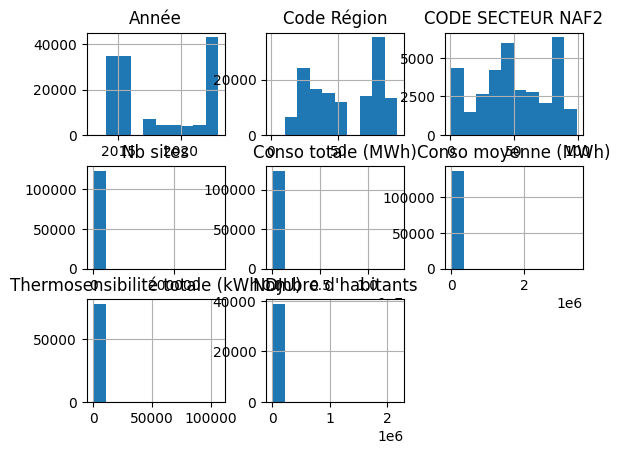

In [40]:
nouvelle_base.hist()

In [41]:
nouvelle_base.describe()

,Année,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Thermosensibilité totale (kWh DJU),Nombre d'habitants
count,136821.000000,136821.000000,34435.000000,123619.000000,1.236190e+05,1.368210e+05,77515.000000,3.869500e+04
mean,2017.884623,56.151103,49.872572,304.290230,5.061326e+03,8.349993e+02,17.021494,7.278740e+03
std,3.798778,25.963165,27.570325,2848.838104,6.003756e+04,1.907457e+04,614.390244,3.722148e+04
min,2013.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2014.000000,32.000000,31.000000,1.000000,9.858550e+01,6.346054e+00,0.000000,4.940000e+02
50%,2015.000000,53.000000,47.000000,4.000000,4.330000e+02,2.498300e+01,0.000000,1.443000e+03
75%,2023.000000,84.000000,71.000000,80.000000,1.977631e+03,1.352910e+02,0.000000,4.603500e+03
max,2023.000000,94.000000,99.000000,310261.000000,1.312829e+07,3.426639e+06,106333.382796,2.175601e+06


## Donnée de la population

In [42]:
population_ville = pd.read_csv('./data/datapopulation.csv', sep = ';', header=2)
population_ville

,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34930,97613,M'Tsangamouji,N/A - résultat non disponible
34931,97614,Ouangani,N/A - résultat non disponible
34932,97615,Pamandzi,N/A - résultat non disponible
34933,97616,Sada,N/A - résultat non disponible


In [43]:
nouvelle_population= population_ville.iloc[:34917]
nouvelle_population


,Code,Libellé,Population municipale 2021
0,01001,L'Abergement-Clémenciat,832
1,01002,L'Abergement-de-Varey,267
2,01004,Ambérieu-en-Bugey,14854
3,01005,Ambérieux-en-Dombes,1897
4,01006,Ambléon,113
...,...,...,...
34912,97419,Sainte-Rose,6343
34913,97420,Sainte-Suzanne,24293
34914,97421,Salazie,7243
34915,97422,Le Tampon,81943


In [44]:
nouvelle_population['Population municipale 2021'] = pd.to_numeric(nouvelle_population['Population municipale 2021'], errors='coerce')

/tmp/ipykernel_297904/374495548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouvelle_population['Population municipale 2021'] = pd.to_numeric(nouvelle_population['Population municipale 2021'], errors='coerce')


In [45]:

numbers = [int(item) for item in nouvelle_population if item.isdigit()]


In [46]:
numbers.plot(kind='hist', x='Libellé', y='Population municipale 2021', figsize=(10, 6), color='yellow', linestyle='dashed', linewidth=2)
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

AttributeError: 'list' object has no attribute 'plot'

In [43]:
nouvelle_population['Population municipale 2021'].max()

'N/A - résultat non disponible'

In [45]:
nouvelle_population.dtypes

Code                          object
Libellé                       object
Population municipale 2021    object
dtype: object

In [44]:
nouvelle_population.plot(kind='hist', x='Libellé', y='Population municipale 2021', figsize=(10, 6), color='yellow', linestyle='dashed', linewidth=2)
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

TypeError: no numeric data to plot

In [12]:
#fusion la base de consommation et population

In [13]:
base_total = pd.merge(base, nouvelle_population, left_on='Code Commune', right_on='Code', how='inner')
base_total

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique,Code,Libellé,Population municipale 2021
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335
3,GRDF,Gaz,2017,37124,Larçay,200073161,CC Touraine-Est Vallées,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37124,Larçay,2497
4,Enedis,Electricité,2014,37124,Larçay,200073161,CC Touraine-Est Vallées,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37124,Larçay,2497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,Enedis,Electricité,2015,68045,Bourbach-le-Bas,200036465,CC de Thann-Cernay,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68045,Bourbach-le-Bas,551
32574,Enedis,Electricité,2015,68046,Bourbach-le-Haut,200036465,CC de Thann-Cernay,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68046,Bourbach-le-Haut,414
32575,Enedis,Electricité,2015,68049,Bouxwiller,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68049,Bouxwiller,425
32576,Enedis,Electricité,2015,68049,Bouxwiller,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68049,Bouxwiller,425


In [14]:
len(base_total['Nom Commune'].unique())

18332

## Faire une étuse sur  les petit ville 

In [15]:
df = pd.read_csv('./data/PVD_2024.csv')
petit = df['lib_com'] 

In [16]:
petit_ville = pd.merge(base_total, petit, left_on='Nom Commune', right_on='lib_com', how='inner')
petit_ville

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique,Code,Libellé,Population municipale 2021,lib_com
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37123,Langeais,4335,Langeais
3,GRDF,Gaz,2017,37130,Ligueil,200071587,CC Loches Sud Touraine,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37130,Ligueil,2103,Ligueil
4,Enedis,Electricité,2014,37130,Ligueil,200071587,CC Loches Sud Touraine,NaN,37,Indre-et-Loire,...,NaN,NaN,NaN,NaN,NaN,NaN,37130,Ligueil,2103,Ligueil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3112,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3113,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,NaN,67,Bas-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,67281,Marckolsheim,4309,Marckolsheim
3114,Enedis,Electricité,2015,68004,Altkirch,200066041,CC Sundgau,NaN,68,Haut-Rhin,...,NaN,NaN,NaN,NaN,NaN,NaN,68004,Altkirch,5608,Altkirch


In [17]:
petit_ville_cleaned= petit_ville.dropna(axis=1, how='all')
petit_ville_cleaned

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Code Département,Nom Département,Code Région,...,Conso totale (MWh),Conso moyenne (MWh),Nombre de mailles secretisées,Part thermosensible (%),Thermosensibilité totale (kWh DJU),Thermosensibilité moyenne (kWh DJU),Code,Libellé,Population municipale 2021,lib_com
0,GRDF,Gaz,2017,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,2692.00,448.666667,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
1,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,20751.19,1729.265833,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
2,Enedis,Electricité,2014,37123,Langeais,200072981,CC Touraine Ouest Val de Loire,37,Indre-et-Loire,24,...,3501.17,145.882083,0,0.0,0.0,0.0,37123,Langeais,4335,Langeais
3,GRDF,Gaz,2017,37130,Ligueil,200071587,CC Loches Sud Touraine,37,Indre-et-Loire,24,...,7066.00,20.967359,0,0.0,0.0,0.0,37130,Ligueil,2103,Ligueil
4,Enedis,Electricité,2014,37130,Ligueil,200071587,CC Loches Sud Touraine,37,Indre-et-Loire,24,...,7829.76,6.283917,0,0.0,0.0,0.0,37130,Ligueil,2103,Ligueil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,133.24,44.413333,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3112,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,13184.50,1318.450000,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3113,Enedis,Electricité,2015,67281,Marckolsheim,200030526,CC du Ried de Marckolsheim,67,Bas-Rhin,44,...,6376.00,265.666667,0,0.0,0.0,0.0,67281,Marckolsheim,4309,Marckolsheim
3114,Enedis,Electricité,2015,68004,Altkirch,200066041,CC Sundgau,68,Haut-Rhin,44,...,15074.62,255.502034,0,0.0,0.0,0.0,68004,Altkirch,5608,Altkirch


In [18]:
len(petit_ville_cleaned['FILIERE'].unique())

2

In [19]:
petit_ville_cleaned.columns

Index(['OPERATEUR', 'FILIERE', 'Année', 'Code Commune', 'Nom Commune',
       'Code EPCI', 'Nom EPCI', 'Code Département', 'Nom Département',
       'Code Région', 'Nom Région', 'CODE CATEGORIE CONSOMMATION',
       'CODE GRAND SECTEUR', 'Nb sites', 'Conso totale (MWh)',
       'Conso moyenne (MWh)', 'Nombre de mailles secretisées',
       'Part thermosensible (%)', 'Thermosensibilité totale (kWh DJU)',
       'Thermosensibilité moyenne (kWh DJU)', 'Code', 'Libellé',
       'Population municipale 2021', 'lib_com'],
      dtype='object')

In [20]:
petit_ville_cleaned.values

array([['GRDF', 'Gaz', 2017, ..., 'Langeais', '4335', 'Langeais'],
       ['Enedis', 'Electricité', 2014, ..., 'Langeais', '4335',
        'Langeais'],
       ['Enedis', 'Electricité', 2014, ..., 'Langeais', '4335',
        'Langeais'],
       ...,
       ['Enedis', 'Electricité', 2015, ..., 'Marckolsheim', '4309',
        'Marckolsheim'],
       ['Enedis', 'Electricité', 2015, ..., 'Altkirch', '5608',
        'Altkirch'],
       ['Enedis', 'Electricité', 2015, ..., 'Altkirch', '5608',
        'Altkirch']], dtype=object)

In [21]:
petit_ville_cleaned.isnull().sum()

OPERATEUR                               0
FILIERE                                 0
Année                                   0
Code Commune                            0
Nom Commune                             0
Code EPCI                               0
Nom EPCI                                0
Code Département                        0
Nom Département                         0
Code Région                             0
Nom Région                              0
CODE CATEGORIE CONSOMMATION             0
CODE GRAND SECTEUR                      0
Nb sites                               86
Conso totale (MWh)                     86
Conso moyenne (MWh)                     0
Nombre de mailles secretisées           0
Part thermosensible (%)                 0
Thermosensibilité totale (kWh DJU)      0
Thermosensibilité moyenne (kWh DJU)     0
Code                                    0
Libellé                                 0
Population municipale 2021              0
lib_com                           

In [22]:
petit_ville_cleaned['Nom Commune'].value_counts()


Nom Commune
L'Isle-Jourdain    16
Bellegarde         11
Beaucaire          11
Plouhinec          10
Valence             9
                   ..
Freneuse            1
Terres-de-Caux      1
Étretat             1
Bolbec              1
Giromagny           1
Name: count, Length: 1297, dtype: int64

array([[<Axes: title={'center': 'Année'}>,
        <Axes: title={'center': 'Code Région'}>,
        <Axes: title={'center': 'Nb sites'}>],
       [<Axes: title={'center': 'Conso totale (MWh)'}>,
        <Axes: title={'center': 'Conso moyenne (MWh)'}>,
        <Axes: title={'center': 'Nombre de mailles secretisées'}>],
       [<Axes: title={'center': 'Part thermosensible (%)'}>,
        <Axes: title={'center': 'Thermosensibilité totale (kWh DJU)'}>,
        <Axes: title={'center': 'Thermosensibilité moyenne (kWh DJU)'}>]],
      dtype=object)

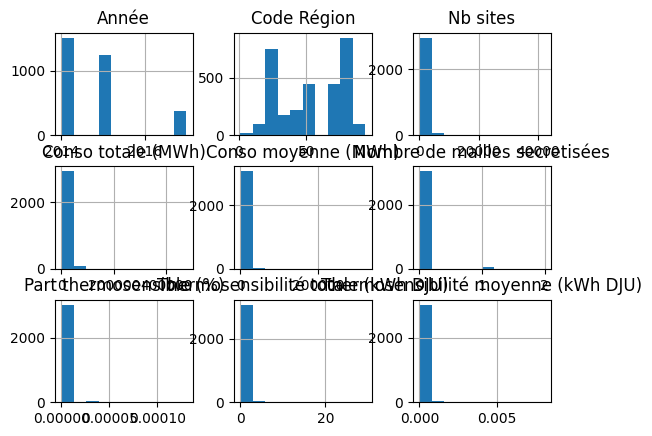

In [23]:
petit_ville_cleaned.hist()

In [24]:
commune_population = petit_ville_cleaned[["Nom Commune","Population municipale 2021"]].groupby("Nom Commune")
print(commune_population)

In [25]:
commune_population = petit_ville_cleaned[["Nom Commune","Population municipale 2021"]].groupby("Nom Commune")
print(commune_population)



In [26]:
commune_population_sum = commune_population.sum()
print(commune_population_sum)


                     Population municipale 2021
Nom Commune                                    
Ablis                  371537153715371537153715
Agon-Coutainville                          2941
Ahun                           1433143314331433
Aigre                  159715971597159715971597
Aigueperse                             27362736
...                                         ...
Évaux-les-Bains                    129112911291
Évian-les-Bains                    921492149214
Évrecy                                     2037
Évron                                  85088508
Ézy-sur-Eure       3669366936693669366936693669

[1297 rows x 1 columns]


## faire les graphique avec ls petite ville

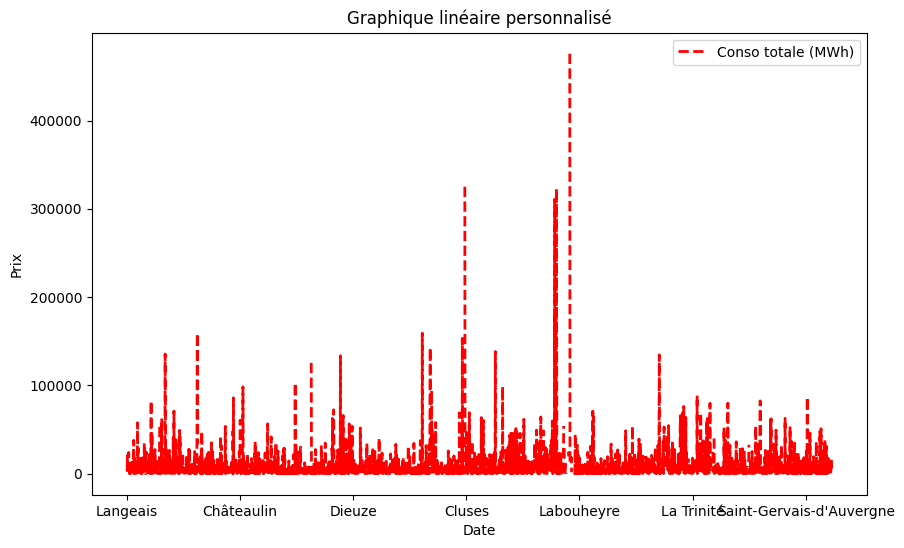

In [27]:
petit_ville_cleaned.plot(kind='line', x='Nom Commune', y='Conso totale (MWh)', figsize=(10, 6), color='red', linestyle='dashed', linewidth=2)
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

/tmp/ipykernel_770789/3755274835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petit_ville_cleaned['Population municipale 2021'] = pd.to_numeric(


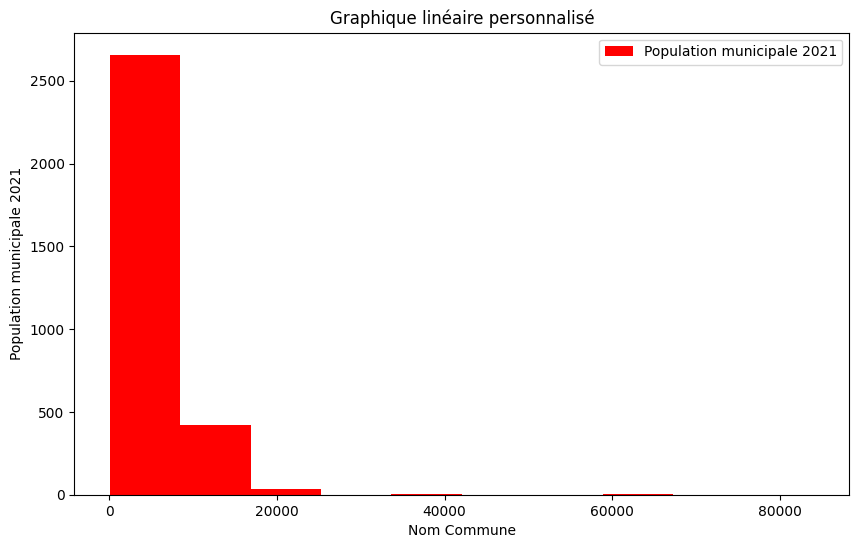

In [28]:
# Vérifier les types de données
#print(petit_ville_cleaned.dtypes)

# Convertir la colonne en numérique si nécessaire
petit_ville_cleaned['Population municipale 2021'] = pd.to_numeric(
    petit_ville_cleaned['Population municipale 2021'], errors='coerce'
)

# Supprimer ou traiter les valeurs manquantes
petit_ville_cleaned = petit_ville_cleaned.dropna(subset=['Population municipale 2021'])

# Tracer le graphique
petit_ville_cleaned.plot(
    kind='hist', 
    x='Nom Commune', 
    y='Population municipale 2021', 
    figsize=(10, 6), 
    color='red', 
    linestyle='dashed', 
    linewidth=2
)
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Nom Commune')
plt.ylabel('Population municipale 2021')
plt.show()


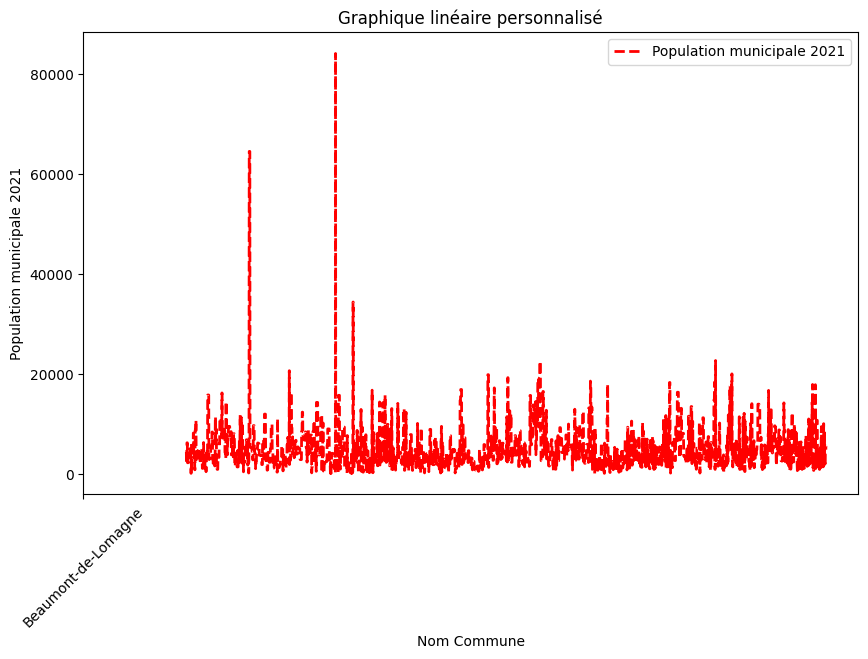

In [29]:
ax = petit_ville_cleaned.plot(
    kind='line',
    x='Nom Commune',
    y='Population municipale 2021',
    figsize=(10, 6),
    color='red',
    linestyle='dashed',
    linewidth=2
)
ax.set_xticks(ax.get_xticks()[::10])  # Affiche un label toutes les 10 communes
plt.xticks(rotation=45)  # Tourne les noms pour éviter le chevauchement
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Nom Commune')
plt.ylabel('Population municipale 2021')
plt.show()


In [30]:
print(petit_ville_cleaned['Nom Commune'])


0           Langeais
1           Langeais
2           Langeais
3            Ligueil
4            Ligueil
            ...     
3111    Marckolsheim
3112    Marckolsheim
3113    Marckolsheim
3114        Altkirch
3115        Altkirch
Name: Nom Commune, Length: 3116, dtype: object


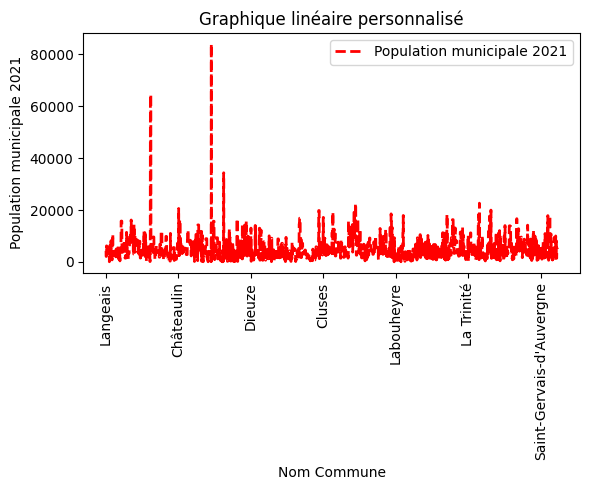

In [31]:
ax = petit_ville_cleaned.plot(
    kind='line',
    x='Nom Commune',
    y='Population municipale 2021',
    figsize=(6, 5),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.xticks(rotation=90)  # Assure l'affichage lisible des labels
plt.title('Graphique linéaire personnalisé')
plt.xlabel('Nom Commune')
plt.ylabel('Population municipale 2021')
plt.tight_layout()  # Ajuste les marges automatiquement
plt.show()


# Faire un graphique cambabere

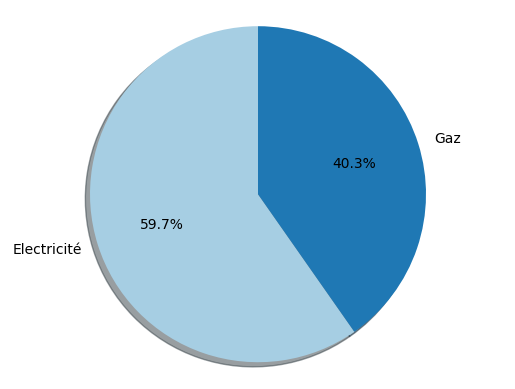

In [32]:
grouped_data = petit_ville_cleaned.groupby('FILIERE')['Population municipale 2021'].sum()

plt.pie(grouped_data, labels=grouped_data.index, 
        colors=plt.cm.Paired(range(len(grouped_data))),
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.savefig('PieChart01.png')
plt.show()

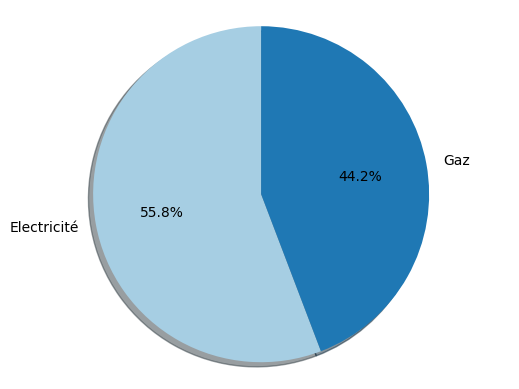

In [33]:
grouped_data = petit_ville_cleaned.groupby('FILIERE')['Conso totale (MWh)'].sum()

plt.pie(grouped_data, labels=grouped_data.index, 
        colors=plt.cm.Paired(range(len(grouped_data))),
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.savefig('PieChart01.png')
plt.show()


In [34]:
grouped_data = petit_ville_cleaned.groupby('')['Conso totale (MWh)'].sum()

plt.pie(grouped_data, labels=grouped_data.index, 
        colors=plt.cm.Paired(range(len(grouped_data))),
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.savefig('PieChart01.png')
plt.show()

KeyError: ''

## Exemple de faire une carte vide 

In [20]:
#Position [latitude, longitude] sur laquelle est centrée la carte
location = [47, 1]

#Niveau de zoom initial : 
#3-4 pour un continent, 5-6 pour un pays, 11-12 pour une ville
zoom = 6

#Style de la carte
tiles = 'cartodbpositron'

Carte = folium.Map(location = location,
                   zoom_start = zoom,
                   tiles = tiles)


display(Carte)

In [21]:
#Position du marqueur
location = [45.8, 1.2]

#Texte à afficher lorsqu'on clique sur le marqueur
texte = "Limoge est là (à peu près)"

#Création du marqueur
marqueur = folium.Marker(location = location,
                        popup = texte)

#Ajout à la carte
marqueur.add_to(Carte)

display(Carte)

## Etude sur la Festival global

In [32]:
festival = pd.read_csv('./data/Festival_global.csv', sep = ';')
festival

,﻿Nom du festival,Envergure territoriale,Région principale de déroulement,Département principal de déroulement,Commune principale de déroulement,Code postal (de la commune principale de déroulement),Code Insee commune,Code Insee EPCI,Libellé EPCI,Numéro de voie,...,Sous-catégorie musique,Sous-catégorie Musique CNM,Sous-catégorie cinéma et audiovisuel,Sous-catégorie arts visuels et arts numériques,Sous-catégorie livre et littérature,Période principale de déroulement du festival,Identifiant Agence A,Identifiant,Géocodage xy,identifiant CNM
0,Festival andalou,Régionale,Provence-Alpes-Côte d'Azur,Vaucluse,Avignon,84000,84007,248400251,CA du Grand Avignon (COGA),NaN,...,Musiques du monde,09- Pluridisciplinaire,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_84007_514,"43.9352448339, 4.84071572505",1558.0
1,Festival Rêves d'enfants,NaN,Provence-Alpes-Côte d'Azur,Hautes-Alpes,Briançon,5105,5023,240500439,CC du Briançonnais,NaN,...,NaN,NaN,NaN,NaN,Fiction,Avant-saison (1er janvier - 20 juin),NaN,FEST_05023_1069,"44.8994986041, 6.64947524018",NaN
2,Printemps de Paroles,NaN,Île-de-France,Seine-et-Marne,Bussy-Saint-Martin,77600,77059,247700594,Marne et Gondoire,NaN,...,NaN,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_77059_1118,"48.8462454012, 2.67900406868",NaN
3,Pharaonic,NaN,Auvergne-Rhône-Alpes,Savoie,Chambéry,73000,73065,200069110,CA du Grand Chambéry,NaN,...,Musiques amplifiées ou électroniques,02- Musiques amplifiées ou électroniques,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_73065_1434,"45.583182552, 5.90903392417",2282.0
4,Sarcus Festival,NaN,Centre-Val de Loire,Indre-et-Loire,Chemillé-sur-Indrois,37460,37069,200071587,CC Loches Sud Touraine,NaN,...,"Musiques électroniques, techno",02- Musiques amplifiées ou électroniques,NaN,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_37069_1605,"47.1535504221, 1.15871292042",5668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,Les Z'arpetes,NaN,Nouvelle-Aquitaine,Gironde,Villenave-d'Ornon,33140,33550,243300316,Bordeaux Métropole,NaN,...,NaN,NaN,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),LA186,FEST_33550_7100,"44.773185218, -0.558212256384",NaN
7279,Jazz à Ville sur Auzon,NaN,Provence-Alpes-Côte d'Azur,Vaucluse,Villes-sur-Auzon,84570,84148,200035723,CC Ventoux Sud,NaN,...,Jazz,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_84148_7131,"44.0660605145, 5.25707803023",NaN
7280,Parlez-moi d'humour,NaN,Bretagne,Ille-et-Vilaine,Vitré,35500,35360,200039022,CA Vitré Communauté,NaN,...,NaN,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_35360_7168,"48.1140815063, -1.19370720718",NaN
7281,Festival des cultures du monde,NaN,Auvergne-Rhône-Alpes,Isère,Voiron,38500,38563,243800984,CA du Pays Voironnais,45,...,NaN,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_38563_7192,"45.3791720843, 5.58240310671",NaN


##### L’analyse descriptive

In [47]:
festival.describe()

,identifiant CNM
count,958.000000
mean,2244.669102
std,1792.419130
min,2.000000
25%,638.500000
50%,1812.000000
75%,3638.750000
max,6108.000000


In [55]:
festival.isnull().sum()

Nom du festival                                            0
Envergure territoriale                                   5384
Région principale de déroulement                            0
Département principal de déroulement                       26
Commune principale de déroulement                          26
Code postal (de la commune principale de déroulement)      17
Code Insee commune                                          1
Code Insee EPCI                                            36
Libellé EPCI                                               36
Numéro de voie                                           5078
Type de voie (rue, Avenue, boulevard, etc.)              4411
Nom de la voie                                           3782
Adresse postale                                          3771
Complément d'adresse (facultatif)                        5081
Site internet du festival                                 725
Adresse e-mail                                           1704
Décennie 

In [48]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7283 entries, 0 to 7282
Data columns (total 30 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ﻿Nom du festival                                       7283 non-null   object 
 1   Envergure territoriale                                 1899 non-null   object 
 2   Région principale de déroulement                       7283 non-null   object 
 3   Département principal de déroulement                   7257 non-null   object 
 4   Commune principale de déroulement                      7257 non-null   object 
 5   Code postal (de la commune principale de déroulement)  7266 non-null   object 
 6   Code Insee commune                                     7282 non-null   object 
 7   Code Insee EPCI                                        7247 non-null   object 
 8   Libellé EPCI                                    

In [64]:
threshold = 0.5

# Supprimer les colonnes où la majorité des valeurs sont NaN
festivals = festival.loc[:, festival.notna().mean() >= threshold]
festivals

,﻿Nom du festival,Région principale de déroulement,Département principal de déroulement,Commune principale de déroulement,Code postal (de la commune principale de déroulement),Code Insee commune,Code Insee EPCI,Libellé EPCI,Site internet du festival,Adresse e-mail,Décennie de création du festival,Année de création du festival,Discipline dominante,Période principale de déroulement du festival,Identifiant,Géocodage xy
0,Festival andalou,Provence-Alpes-Côte d'Azur,Vaucluse,Avignon,84000,84007,248400251,CA du Grand Avignon (COGA),https://lefestivalandalou.com/,contact@lefestivalandalou.com,De 2000 à 2009,2002,Musique,Avant-saison (1er janvier - 20 juin),FEST_84007_514,"43.9352448339, 4.84071572505"
1,Festival Rêves d'enfants,Provence-Alpes-Côte d'Azur,Hautes-Alpes,Briançon,5105,5023,240500439,CC du Briançonnais,www.serre-chevalier.com,info@ot-briancon.fr,2010 et après,2019,Pluridisciplinaire,Avant-saison (1er janvier - 20 juin),FEST_05023_1069,"44.8994986041, 6.64947524018"
2,Printemps de Paroles,Île-de-France,Seine-et-Marne,Bussy-Saint-Martin,77600,77059,247700594,Marne et Gondoire,http://www.marneetgondoire.fr/parc-culturel-de...,NaN,De 2000 à 2009,01/01/2004 00:00,Pluridisciplinaire,Avant-saison (1er janvier - 20 juin),FEST_77059_1118,"48.8462454012, 2.67900406868"
3,Pharaonic,Auvergne-Rhône-Alpes,Savoie,Chambéry,73000,73065,200069110,CA du Grand Chambéry,http://www.pharaonic.fr/,NaN,2010 et après,2015,Musique,Avant-saison (1er janvier - 20 juin),FEST_73065_1434,"45.583182552, 5.90903392417"
4,Sarcus Festival,Centre-Val de Loire,Indre-et-Loire,Chemillé-sur-Indrois,37460,37069,200071587,CC Loches Sud Touraine,https://sarcus.fr,contact@bleuenuit.fr,2010 et après,2016,Musique,Après-saison (6 septembre - 31 décembre),FEST_37069_1605,"47.1535504221, 1.15871292042"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,Les Z'arpetes,Nouvelle-Aquitaine,Gironde,Villenave-d'Ornon,33140,33550,243300316,Bordeaux Métropole,http://www.leszarpetes.com/,leszarpetes@hotmail.fr,De 2000 à 2009,2003,Spectacle vivant,Avant-saison (1er janvier - 20 juin),FEST_33550_7100,"44.773185218, -0.558212256384"
7279,Jazz à Ville sur Auzon,Provence-Alpes-Côte d'Azur,Vaucluse,Villes-sur-Auzon,84570,84148,200035723,CC Ventoux Sud,jazzavillessurauzon.free.fr,max.bontoux13@gmail.com,De 2000 à 2009,2004,Musique,Saison (21 juin - 5 septembre),FEST_84148_7131,"44.0660605145, 5.25707803023"
7280,Parlez-moi d'humour,Bretagne,Ille-et-Vilaine,Vitré,35500,35360,200039022,CA Vitré Communauté,www.mairie-vitre.com,communication@vitrecommunaute.org,2010 et après,2018,"Livre, littérature",Saison (21 juin - 5 septembre),FEST_35360_7168,"48.1140815063, -1.19370720718"
7281,Festival des cultures du monde,Auvergne-Rhône-Alpes,Isère,Voiron,38500,38563,243800984,CA du Pays Voironnais,https://www.salmorencvoironculturesdumonde.com...,culturesmondevoiron@orange.fr,De 1980 à 1989,1983,Spectacle vivant,Saison (21 juin - 5 septembre),FEST_38563_7192,"45.3791720843, 5.58240310671"


In [66]:
festivals.dtypes

Nom du festival                                         object
Région principale de déroulement                         object
Département principal de déroulement                     object
Commune principale de déroulement                        object
Code postal (de la commune principale de déroulement)    object
Code Insee commune                                       object
Code Insee EPCI                                          object
Libellé EPCI                                             object
Site internet du festival                                object
Adresse e-mail                                           object
Décennie de création du festival                         object
Année de création du festival                            object
Discipline dominante                                     object
Période principale de déroulement du festival            object
Identifiant                                              object
Géocodage xy                             

In [71]:
festivals = festivals.astype({'Code postal (de la commune principale de déroulement)': 'int', 'Géocodage xy': 'int'})

ValueError: invalid literal for int() with base 10: '75010, 75018, 75019': Error while type casting for column 'Code postal (de la commune principale de déroulement)'